## Downside risk measures

### Semivolatility (or semideviation) (نیم انحراف معیار)
به یاد داشته باشید که نوسانات یک دارایی صرفاً انحراف معیار است.

نیمه انحراف معیار صرفاً نوسان بخشی از مجموعه داده ها است که منفی است.

اما ما یک تعریف جامع تر میکنیم. نیم انحراف معیار فقط برای بخشی از داده ها محاسبه میگردد که از میانگین کمتر باشند

$$
\sigma_{semi} := \sqrt{ \frac{1}{N_{semi}} \sum_{R_t < 0} (R_t - \mu_{semi})^2 },
$$



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.style.use("seaborn-dark")  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import Maktab_S_J as msj

In [ ]:
#add to msj

def semideviation(r):
    """
    نیمه انحراف را برمی گرداند
    r ===>  باید یک سری یا یک دیتافریم باشد، در غیر این صورت یک ارور ایجاد می کند
    """
    if isinstance(r, pd.Series):
        is_negative = r < 0
        return r[is_negative].std(ddof=0)
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(semideviation)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


In [ ]:
hfi = msj.get_hfi_returns()

In [ ]:
# محاسبه نیم انحراف معیار برای کل ستون ها
msj.semideviation( hfi )

In [ ]:
hfi[hfi<0].std(ddof=0)

In [ ]:
msj.semideviation(hfi).sort_values()

In [ ]:
ffme = msj.get_ffme_returns()
msj.semideviation(ffme)

### Value at Risk (VaR)

این نشان دهنده **حداکثر ضرر مورد انتظار** در یک دوره زمانی معین است

اول از همه، ما یک اطمینان خاص **سطح** را در $(0,1)$ مشخص می کنیم، اگرچه معمولاً به صورت درصد بیان می شود.

به عنوان مثال سطح 99% را در نظر بگیرید (یعنی 0.99).
وقتی می گوییم 1٪ ارزش در معرض خطر ماهانه، به این معنی است که پس از حذف 1٪ از بدترین زیان، به بدترین نتیجه ممکن در طول یک ماه نگاه می کنیم. به عبارت دیگر، حداکثر ضرری که می توانید با احتمال 99 درصد در طول یک ماه متحمل شوید چقدر است.

**Example:** سری بازده زیر را در نظر بگیرید
$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$
**ارزش در معرض 90 درصد چه مقدار است** 

ابتدا ده درصد پایینی را مشخص میکنیم. سپس اولین بازده بعد از آن ارزش در معرض خطر می باشد

Then $\text{VaR} = 4\%$.


تعریف ارزش در معرض خطر به صورت ریاضی به این صورت است

$\alpha\in(0,1)$,
$$
\text{VaR}_{\alpha}
:= - \text{inf}\{x\in\mathbb{R} \;:\; \mathbb{P}(R \leq x) \geq 1-\alpha \} 
= - \text{inf}\left\{x\in\mathbb{R} \;:\;  \mathbb{P}(R \geq x) \leq \alpha\right\},  
$$


### سه مدل روش محاسبه ارزش در معرض خطر داریم

1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

<img src="value at risk1.png" width="700" height="450">

<img src="note4.png" width="700" height="450">

### Methods for estimating VaR 

#### Historical method (non parametric)

این شهودی ترین موردی است که به سادگی با استفاده از تعریف به عنوان توزیع کمی بازده دارایی ها مورد بررسی قرار میگیرد .

به عنوان مثال، بازده شاخص های صندوق تامینی را در نظر بگیرید:

In [ ]:
# the CTA global returns
hfi = msj.get_hfi_returns()

# plot their distribution
ax = hfi["CTA Global"].plot.hist(figsize=(8,4), bins=60, density=True)
ax.set_title("CTA Global returns distribution")
ax.grid()

ما ارزش در معرض ریسک 90 و 95 و 99 را میخواهیم.
از متد صدک استفاده می کنیم

In [ ]:
alpha = np.array([0.90, 0.95, 0.99])
level = 1 - alpha

# ضرب در 100 میکنیم که عددی بین 0 تا 100 تحویل دهد
VaRs = -np.percentile(hfi["CTA Global"], level*100)

print("90% Var: {:.2f}%".format(VaRs[0] * 100))
print("95% Var: {:.2f}%".format(VaRs[1] * 100))
print("99% Var: {:.2f}%".format(VaRs[2] * 100))

این اینطور معنی میدهد که به احتمال 10 درصد, 2.4 درصد دارایی را از دست میدهیم.

به احتمال 5 درصد, 3 درصد از دارایی و به احتمال 1 درصد, 5 درصد از دارایی را از دست میدهیم

In [ ]:
## add to msj

def var_historic(r, level=5):
    """
    ارزش در معرض خطر تاریخی را در سطح مشخصی برمی‌گرداند
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")   

In [25]:
msj.var_historic(hfi , level = 5).sort_values()

Fixed Income Arbitrage    0.00787
Equity Market Neutral     0.00814
Merger Arbitrage          0.01047
Relative Value            0.01174
Global Macro              0.01499
Convertible Arbitrage     0.01576
Distressed Securities     0.01966
Funds Of Funds            0.02047
Event Driven              0.02535
Long/Short Equity         0.02598
CTA Global                0.03169
Emerging Markets          0.04247
Short Selling             0.06783
dtype: float64

شایان ذکر است که این روش محاسبه ارزش در معرض ریسک به مقیاس زمانی بازده ما حساس است،

زیرا ارزش در معرض ریسک محاسبه شده با بازده ماهانه با ارزش در معرض ریسک محاسبه شده با بازده هفتگی متفاوت است.

#### Parametric method (Gaussian)

در اینجا، **فرض می کنیم که بازده ها دارای توزیع نرمال هستند**، که البته **اغلب نادرست** است.


$$
\mathbb{P}(R \leq z_\alpha) = 1-\alpha.
$$
لذا داریم
$$
1-\alpha = \mathbb{P}(R \leq z_\alpha) = \mathbb{P}(\mu+ X\sigma \leq z_\alpha) 
= \mathbb{P}\left(X \leq \frac{z_\alpha-\mu}{\sigma}\right) 
= \Phi\left( \frac{z_\alpha-\mu}{\sigma} \right)
\qquad\Longrightarrow\qquad
z_\alpha = \mu + \Phi^{-1}(1-\alpha)\sigma 
$$
در نتیجه
$$
\text{VaR}_\alpha = -\left(\;\mu + \Phi^{-1}(1-\alpha) \sigma\;\right),
$$


In [20]:
#add to msj

from scipy.stats import norm
def var_gaussian(r, level=5):
    
    # compute the Z score
    z = norm.ppf(level/100)

    return -(r.mean() + z*r.std(ddof=0))



In [21]:
from scipy.stats import norm
norm.ppf(.5)

0.0

In [22]:
norm.ppf(.05)  #مقدار زد آلفا رو میده

-1.6448536269514729

In [24]:
# ارزش در معرض ریسک ماهانه گاوسی شاخص های صندوق تامینی را محاسبه می کنیم 
alpha = 0.95
msj.var_gaussian( hfi, level=1-alpha).sort_values()

Equity Market Neutral     0.022204
Merger Arbitrage          0.026235
Relative Value            0.031924
Fixed Income Arbitrage    0.033532
Global Macro              0.042948
Funds Of Funds            0.046860
Event Driven              0.048646
Convertible Arbitrage     0.048904
Distressed Securities     0.049023
Long/Short Equity         0.059141
CTA Global                0.072563
Emerging Markets          0.100609
Short Selling             0.158511
dtype: float64

#### Cornish-Fisher method (semi parametric)

این اصلاح روش گاوسی پارامتریک است. این روش از بسط چندک‌های کورنیش-فیشر (1937) استفاده می‌کند که اساساً کمیت‌های توزیع غیر گاوسی را با کمیت‌های توزیع گاوسی به روش زیر مرتبط می‌کند.

در این روش فرض خاصی برای توزیع در نظر نمیگیرد چرا که مثلا شاید فرض های تی-استیودنت یا لوگ گاما یا ... غلط باشند


بسط کورنیش-فیشر به صورت زیر می باشد

$$
\tilde{z}_\alpha 
= z_\alpha + \frac{1}{6}(z_\alpha^2 - 1)S 
+ \frac{1}{24}(z_\alpha^3 - 3 z_\alpha)(K-3) 
- \frac{1}{36}(2z_\alpha^3 - 5 z_\alpha)S^2
$$


در نهایت برای محاسبه ارزش در معرض ریسک کورنیش فیشر داریم:
$$
\text{VaR}_\alpha = -\left(\;\mu + \tilde{z}_\alpha  \sigma\;\right).
$$

In [ ]:
#add to msj

from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    If "modified" is True ===> ارزش در معرض تعدیل شده را بر میگرداند
    using the Cornish-Fisher modification
    """
    # compute the Z score
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
    return -(r.mean() + z*r.std(ddof=0))



In [30]:
msj.var_gaussian(hfi, modified=True).sort_values()

Equity Market Neutral     0.010734
Merger Arbitrage          0.012612
Global Macro              0.013581
Relative Value            0.016157
Fixed Income Arbitrage    0.017881
Funds Of Funds            0.021576
Distressed Securities     0.025102
Convertible Arbitrage     0.025166
Event Driven              0.025516
Long/Short Equity         0.027935
CTA Global                0.033094
Emerging Markets          0.053011
Short Selling             0.066157
dtype: float64

### Conditional VaR (or Beyond VaR)

این به عنوان ارزش در معرض خطر شرطی ** فراتر از ** ارزش در معرض خطر تعریف می شود،

یا به طور رسمی تر، بازده هایی که کمتر از ارزش در معرض خطر هستند، نگاه می کنیم. از نظر ریاضی، این خواهد بود:

$$
\text{CVaR} := - \mathbb{E}( R | R<-\text{VaR}) = - \frac{\int_{-\infty}^{-\text{VaR}} t f_R(t)dt }{F_R(-\text{Var})},
$$

<img src="cvar.png" width="750" height="400">

 $f_R$ ===> تابع چگالی بازده ها 

$F_R$ ===> تابع توزیع تجمعی بازده ها 

**Example:** بازده های ماهانه زیر به ما داده شده است
$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$
**ارزش در معرض خطر شرطی ماهانه کدام است?** 

<img src="cvar2.png" width="750" height="400">


<img src="cvar3.png" width="750" height="400">


In [ ]:
#add to msj

def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)    # علامت منفی برای اینه که خود وار ها منفی هستند
        return -r[is_beyond].mean()
    
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


In [31]:
msj.cvar_historic(hfi, level=1).sort_values()

Global Macro              0.029333
Equity Market Neutral     0.036100
Merger Arbitrage          0.036233
Relative Value            0.052367
CTA Global                0.054767
Funds Of Funds            0.061133
Long/Short Equity         0.061867
Distressed Securities     0.070967
Event Driven              0.071267
Fixed Income Arbitrage    0.072467
Convertible Arbitrage     0.086100
Short Selling             0.123867
Emerging Markets          0.141167
dtype: float64

In [32]:
msj.cvar_historic(ffme)

Lo 10    0.162609
Hi 10    0.121277
dtype: float64

#### Compare VaRs

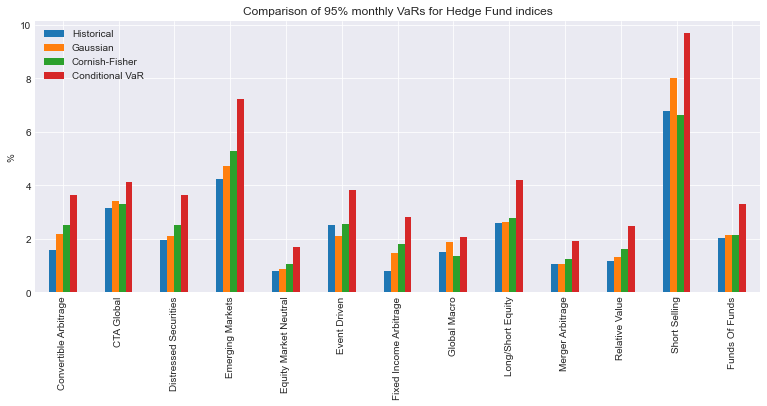

In [33]:
comparevars = pd.concat([msj.var_historic(hfi), msj.var_gaussian(hfi), msj.var_gaussian(hfi,modified=True), msj.cvar_historic(hfi)], axis=1)
comparevars.columns = ["Historical","Gaussian","Cornish-Fisher","Conditional VaR"]
(comparevars * 100).plot.bar(figsize=(13,5), grid=True, title="Comparison of 95% monthly VaRs for Hedge Fund indices")
plt.ylabel("%")
plt.show()

مشاهده کنید که چگونه ارزش در معرض خطر شرطی معمولاً  بزرگتر از ارزش در معرض خطر معمولی است،

در حالی که روش تاریخی معمولاً کوچکترین ارزش در معرض خطر را ارائه می دهد.